In [1]:
from matplotlib import pyplot
from functools import partial
import numpy
import pandas
import ROOT

Welcome to JupyROOT 6.29/01


In [2]:
### UTILS
def round_to_nearest_5(n) -> int:
    r = round(n, -1)
    return r if r > n  else r + 5

def get_y_min_max(graph1, graph2) -> tuple[float, float]:
    n_1 = graph1.GetN()
    y_1 = graph1.GetY()
    n_2 = graph2.GetN()
    y_2 = graph2.GetY()

    ymin_1 = ROOT.TMath.MinElement(n_1, y_1)
    ymax_1 = ROOT.TMath.MaxElement(n_1, y_1)

    ymin_2 = ROOT.TMath.MinElement(n_2, y_2)
    ymax_2 = ROOT.TMath.MaxElement(n_2, y_2)
    
    return min(ymin_1, ymin_2), max(ymax_1, ymax_2)

def get_x_min_max(graph1, graph2) -> tuple[float, float]:
    n_1 = graph1.GetN()
    x_1 = graph1.GetX()
    n_2 = graph2.GetN()
    x_2 = graph2.GetX()

    xmin_1 = ROOT.TMath.MinElement(n_1, x_1)
    xmax_1 = ROOT.TMath.MaxElement(n_1, x_1)

    xmin_2 = ROOT.TMath.MinElement(n_2, x_2)
    xmax_2 = ROOT.TMath.MaxElement(n_2, x_2)
    
    return min(xmin_1, xmin_2), max(xmax_1, xmax_2)

def create_mpl_tcolors() -> dict[str, ROOT.TColor]:
    import matplotlib.colors as mcolors
    return {
        name: ROOT.TColor.GetColor(color)
        for name, color in mcolors.TABLEAU_COLORS.items()
        
    }

PYPLOT_TCOLORS = create_mpl_tcolors()

In [22]:
df = pandas.read_csv("results.csv")
df

,nodes,corespernode,partitions,time
0,3,32,64,159.99
1,2,32,32,275.62
2,3,32,64,139.64
3,2,16,16,477.43
4,3,32,64,123.55
5,2,32,32,237.30
6,3,32,64,125.62
7,5,32,128,83.84
8,2,32,32,198.75
9,2,8,8,756.14


In [33]:
size_GB = 188
nevts = 765_723_174

In [24]:
df["nodes"] = df["nodes"] - 1
df

,nodes,corespernode,partitions,time
0,2,32,64,159.99
1,1,32,32,275.62
2,2,32,64,139.64
3,1,16,16,477.43
4,2,32,64,123.55
5,1,32,32,237.30
6,2,32,64,125.62
7,4,32,128,83.84
8,1,32,32,198.75
9,1,8,8,756.14


In [38]:
df_avg = df.groupby(["nodes","corespernode","partitions"]).mean("time").reset_index()
df_std = df.groupby(["nodes","corespernode","partitions"]).agg({"time":numpy.std}).reset_index()
df_avg["total_cores"] = df_avg.nodes * df_avg.corespernode
df_avg["throughput_GB_s"] = size_GB / df_avg["time"]
df_avg["throughput_evts"] = nevts / df_avg["time"] / 1e3
df_avg["speedup"] = df_avg["throughput_GB_s"] / df_avg["throughput_GB_s"].iloc[0]
df_avg

,nodes,corespernode,partitions,time,total_cores,throughput_GB_s,throughput_evts,speedup
0,1,1,1,5678.965,1,0.033105,134.834987,1.000000
1,1,2,2,3078.148,2,0.061076,248.761000,1.844929
2,1,4,4,1486.318,4,0.126487,515.181256,3.820828
3,1,8,8,757.980,8,0.248028,1010.215539,7.492236
4,1,16,16,398.600,16,0.471651,1921.031545,14.247278
5,1,32,32,224.942,32,0.835771,3404.091606,25.246352
6,2,32,64,135.074,64,1.391830,5668.916105,42.043361
7,4,32,128,71.276,128,2.637634,10743.071637,79.675697
8,8,32,256,49.506,256,3.797519,15467.280208,114.712661


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


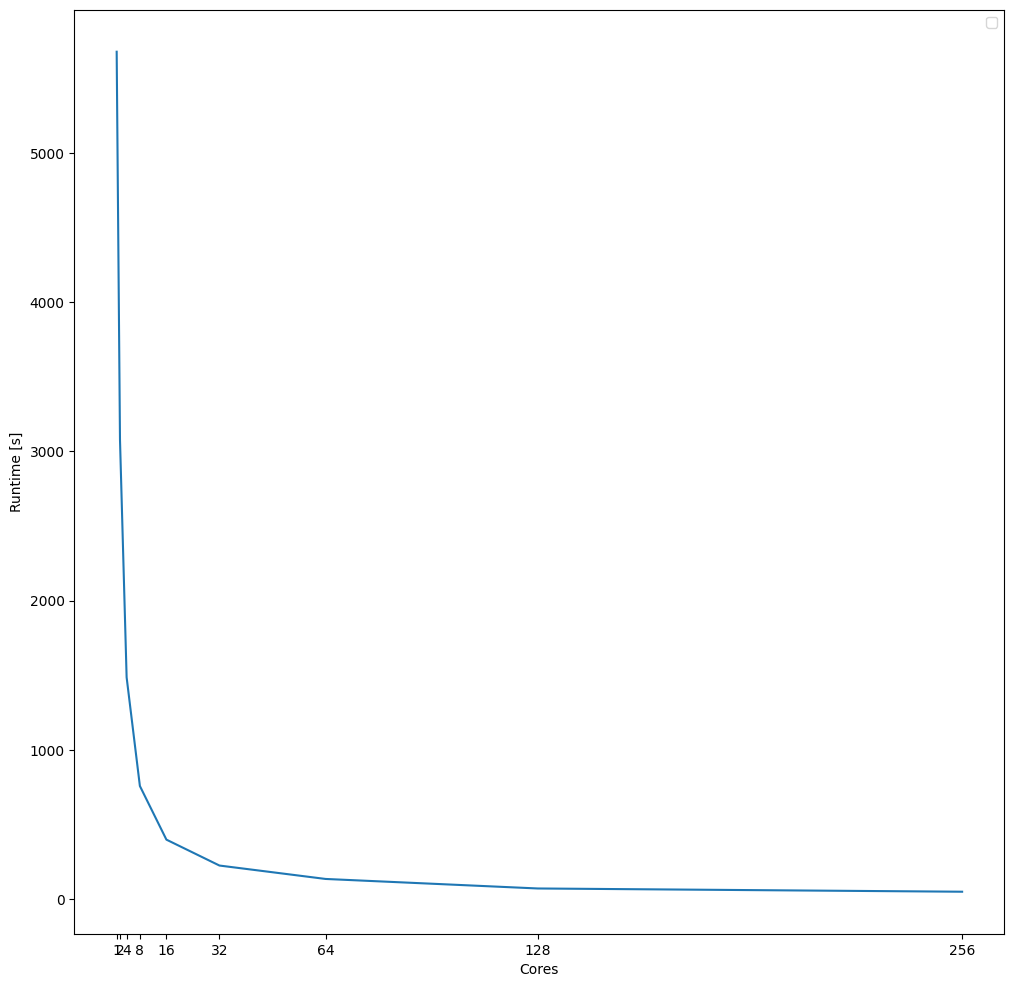

In [29]:
# Plot
fig, ax = pyplot.subplots(figsize=(12,12))
pyplot.xticks(df_avg.total_cores)
pyplot.xlabel("Cores")
pyplot.ylabel("Runtime [s]")
ax.plot(df_avg.total_cores, df_avg.time)
ax.legend()

# TGraph

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file throughput.png has been created


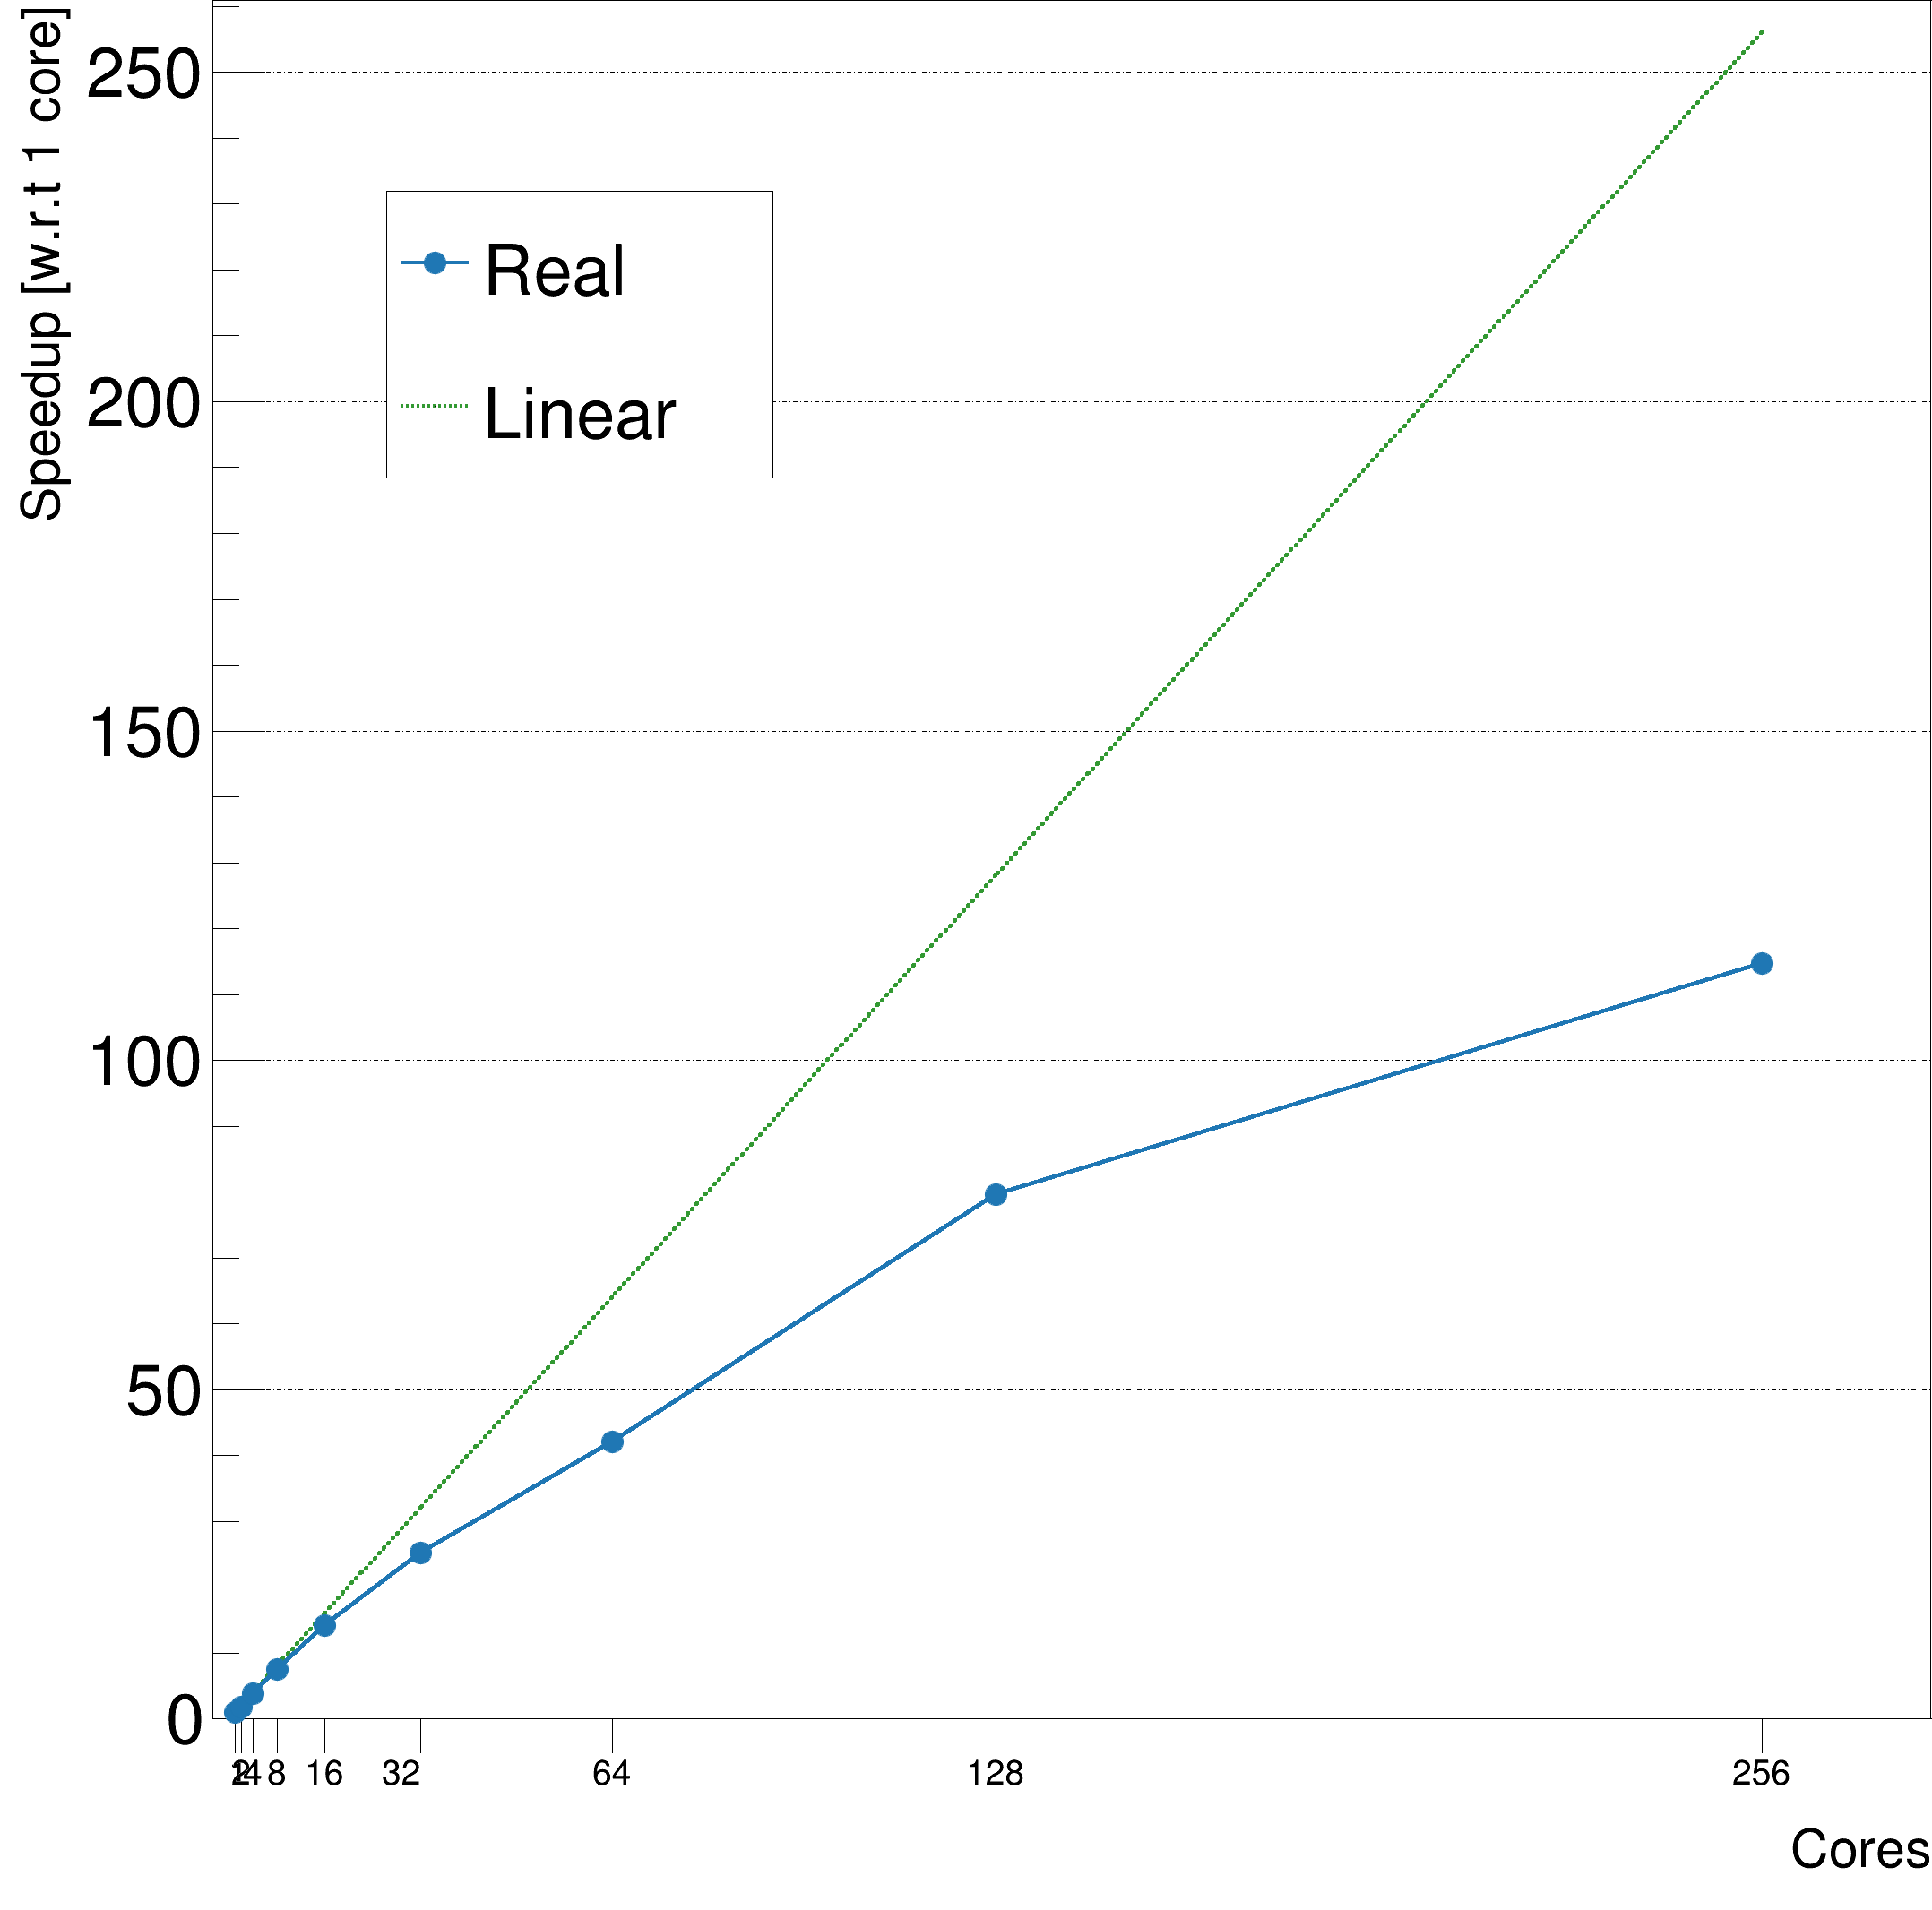

In [79]:
sparkgraph_cold = ROOT.TGraph(len(df_avg.total_cores),
                              numpy.array(df_avg.total_cores, dtype=float),
                              numpy.array(df_avg.speedup, dtype=float))

idealspeedupgraph = ROOT.TGraph(len(df_avg.total_cores),
                                numpy.array(df_avg.total_cores, dtype=float),
                                numpy.array(df_avg.total_cores, dtype=float))

width = 2160
height = 2160
c = ROOT.TCanvas("c", "", width, height)

ymin, ymax = get_y_min_max(idealspeedupgraph, sparkgraph_cold)

idealspeedupgraph.SetTitle("")

idealspeedupgraph.GetXaxis().SetTitle("Cores")
idealspeedupgraph.GetXaxis().SetTitleSize(0.03)
idealspeedupgraph.GetXaxis().SetTitleOffset(1.4)
idealspeedupgraph.GetXaxis().SetLabelSize(0)
idealspeedupgraph.GetXaxis().SetTickLength(0)
idealspeedupgraph.GetXaxis().SetRangeUser(-5,300)

idealspeedupgraph.GetYaxis().SetTitle("Speedup [w.r.t 1 core]")
idealspeedupgraph.GetYaxis().SetTitleSize(0.03)
idealspeedupgraph.GetYaxis().SetTitleOffset(1.8)
idealspeedupgraph.GetYaxis().SetRangeUser(0, ymax+5)
idealspeedupgraph.GetYaxis().SetLabelSize(0.04)
#idealspeedupgraph.GetYaxis().SetTickLength(0)

#idealspeedupgraph.SetMarkerColor(ROOT.kAzure-3)
#idealspeedupgraph.SetMarkerSize(1)
#idealspeedupgraph.SetMarkerStyle(20)
idealspeedupgraph.SetLineStyle(ROOT.kDashed)
idealspeedupgraph.SetLineColorAlpha(PYPLOT_TCOLORS["tab:green"],1)
idealspeedupgraph.SetLineWidth(4)
idealspeedupgraph.Draw("AL")



dy = ymax - ymin
xlabels = []
xticks = []
#ylabels = []
#yticks = []

for i in range(len(df_avg.total_cores)):
    x = idealspeedupgraph.GetPointX(i)
    y = idealspeedupgraph.GetPointY(i)

    xt = ROOT.TLatex(x, -10, str(int(x)))
    xt.SetTextSize(0.02)
    xt.SetTextFont(42)
    if x == 32: # left-align the 1 node point
        xt.SetTextAlign(31)
    else:
        xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, 0, x,0-0.02*dy)
    xl.Draw()
    xticks.append(xl)
    
#    yt = ROOT.TLatex(-50, y-0.2, str(int(y)))
#    yt.SetTextSize(0.03)
#    yt.SetTextFont(42)
#    yt.SetTextAlign(21)
#    yt.Draw()
#    ylabels.append(yt)
#
#    yl = ROOT.TLine(0, y, 50, y)
#    yl.Draw()
#    yticks.append(yl)


sparkgraph_cold.GetYaxis().SetLabelSize(0)
sparkgraph_cold.SetMarkerSize(3)
sparkgraph_cold.SetMarkerStyle(20)
sparkgraph_cold.SetMarkerColor(PYPLOT_TCOLORS["tab:blue"])
sparkgraph_cold.SetLineStyle(ROOT.kSolid)
sparkgraph_cold.SetLineColorAlpha(PYPLOT_TCOLORS["tab:blue"],1)
sparkgraph_cold.SetLineWidth(4)

sparkgraph_cold.Draw("SAME PL")

legend = ROOT.TLegend(0.2,0.75,0.4,0.9)
legend.AddEntry(sparkgraph_cold, "Real")
legend.AddEntry(idealspeedupgraph, "Linear")
legend.Draw()

ROOT.gStyle.SetLegendTextSize(0.04)
ROOT.gStyle.SetGridWidth(1)
ROOT.gStyle.SetGridStyle(5)
c.SetGridy()

c.SetRightMargin(0)
c.SetLeftMargin(0.11)
c.SetTopMargin(0)
c.SetBottomMargin(0.1)

c.Draw()
c.SaveAs("throughput.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file runtime.png has been created


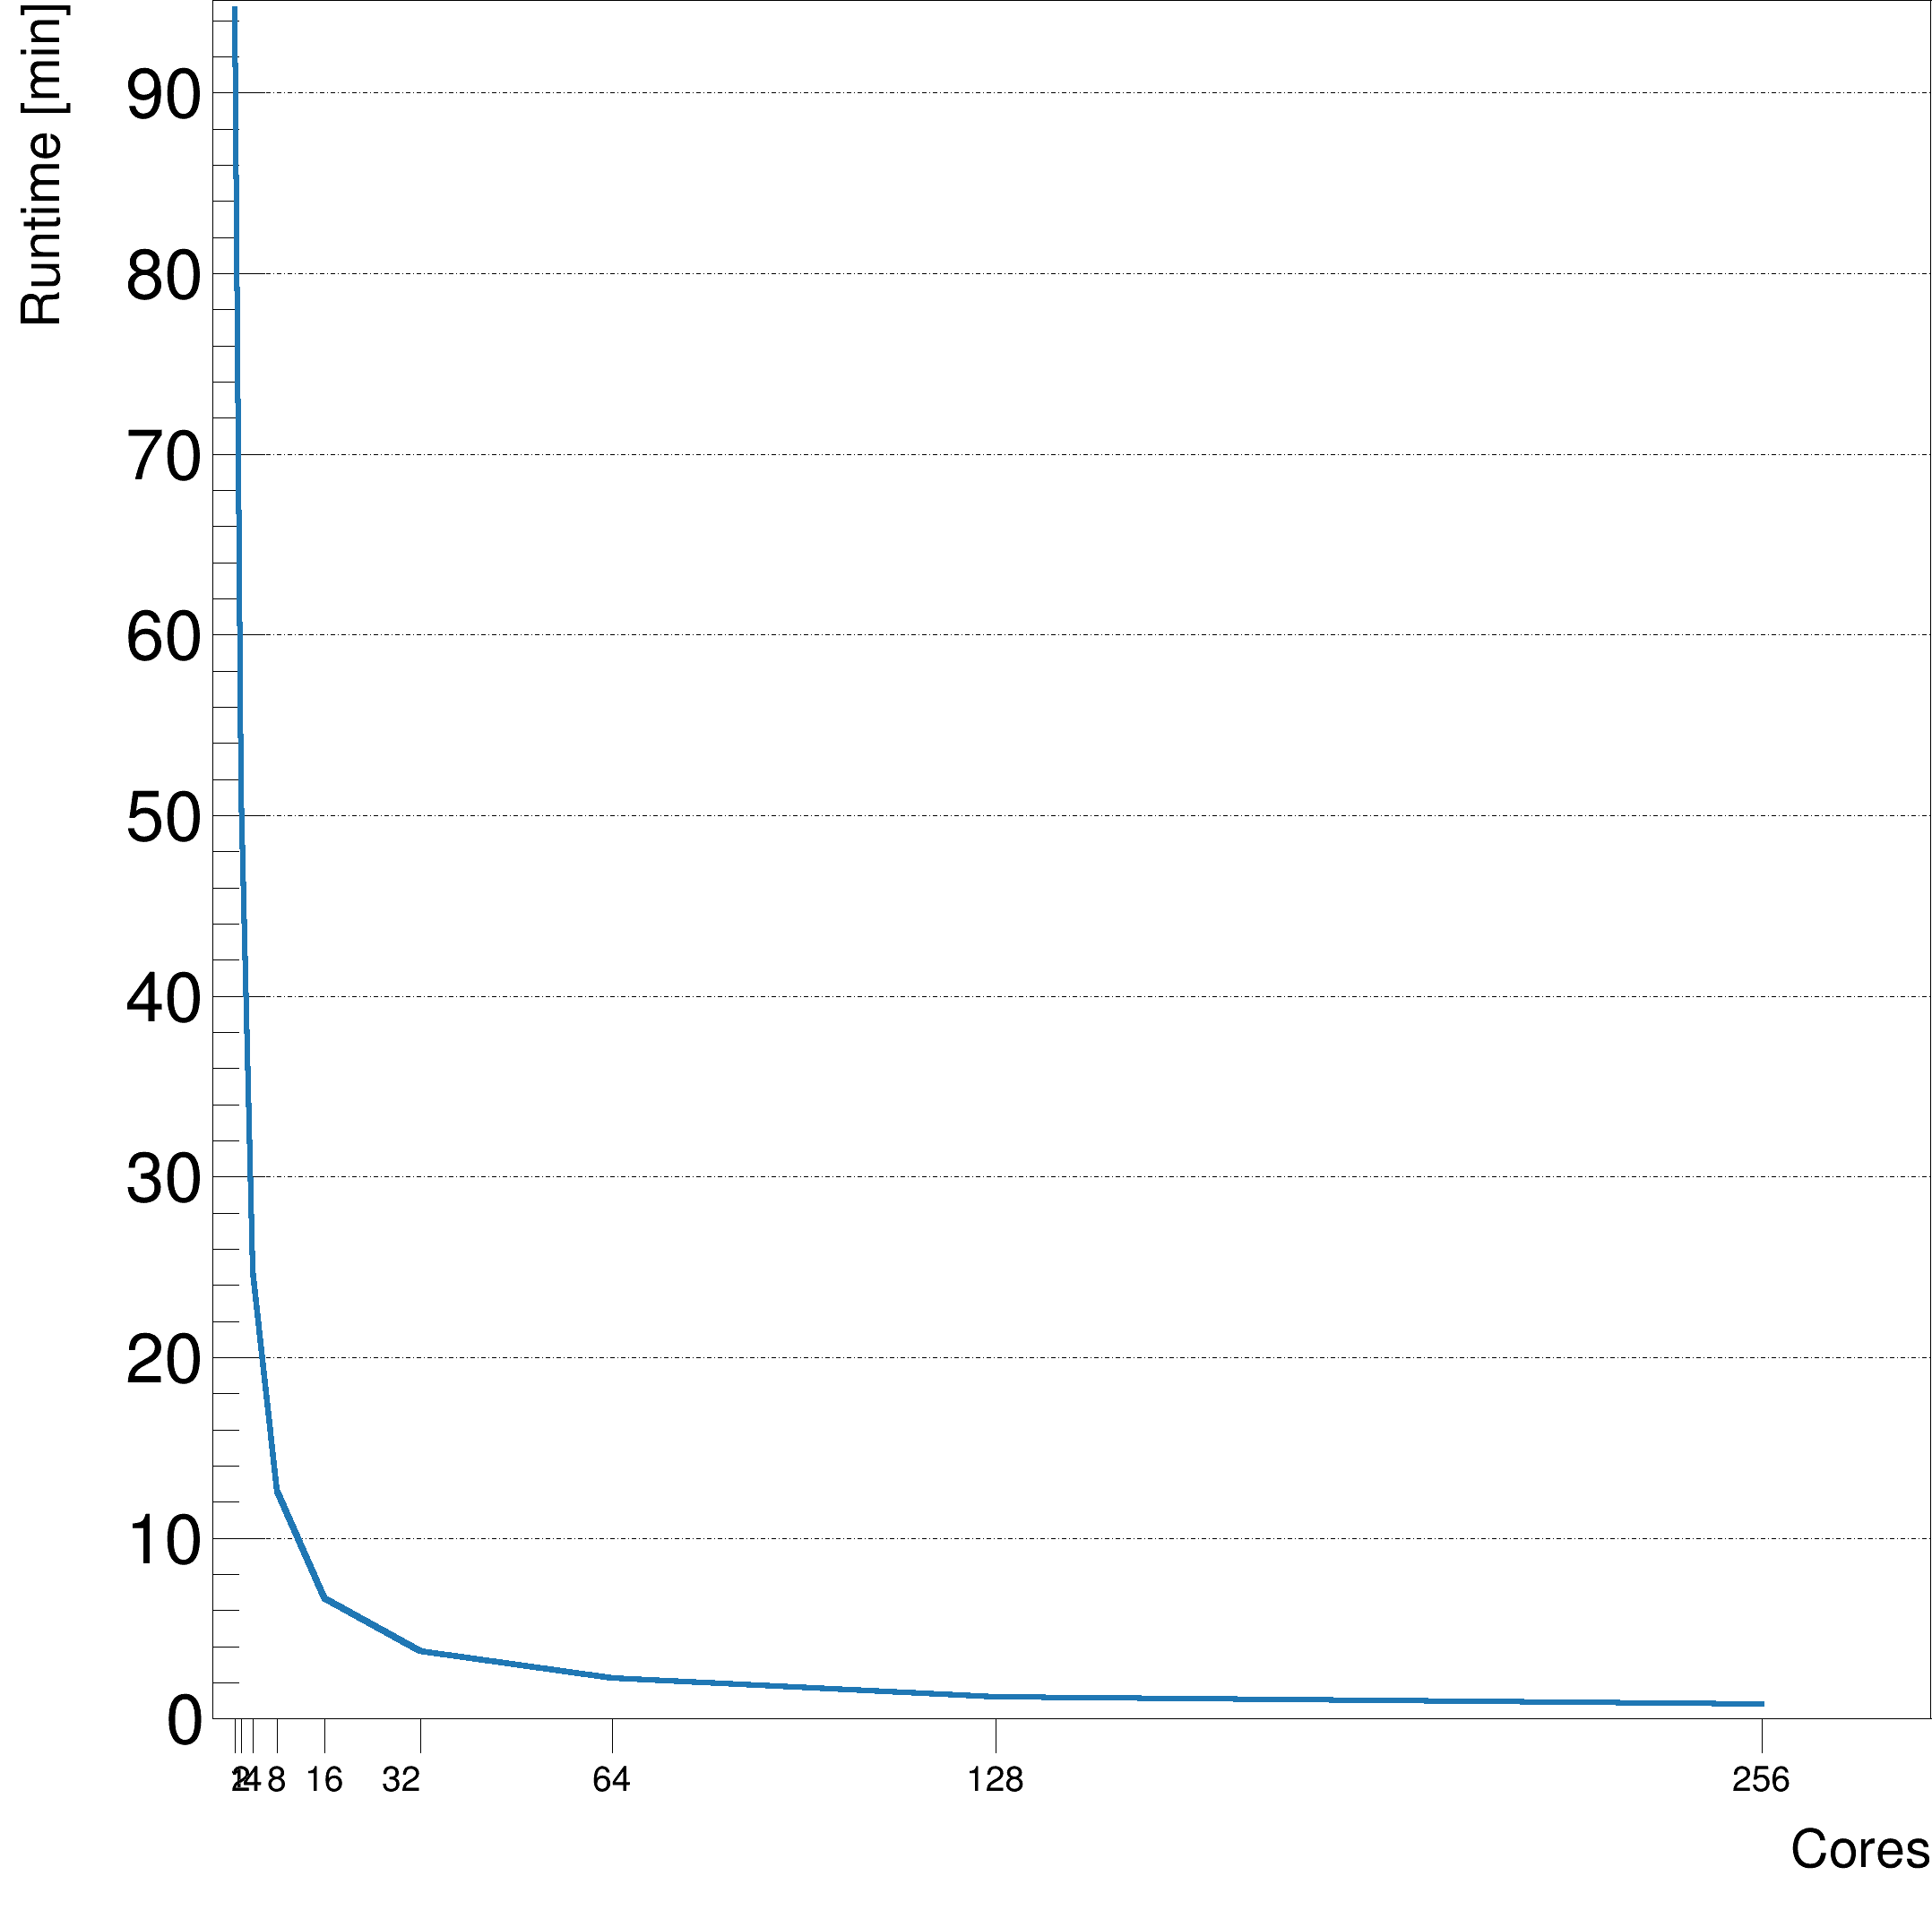

In [80]:
sparkgraph_cold = ROOT.TGraph(len(df_avg.total_cores),
                              numpy.array(df_avg.total_cores, dtype=float),
                              numpy.array(df_avg.time/60, dtype=float))

idealspeedupgraph = ROOT.TGraph(len(df_avg.total_cores),
                                numpy.array(df_avg.total_cores, dtype=float),
                                numpy.array(df_avg.time/60, dtype=float))

width = 2160
height = 2160
c = ROOT.TCanvas("c", "", width, height)

ymin, ymax = get_y_min_max(idealspeedupgraph, sparkgraph_cold)

idealspeedupgraph.SetTitle("")

idealspeedupgraph.GetXaxis().SetTitle("Cores")
idealspeedupgraph.GetXaxis().SetTitleSize(0.03)
idealspeedupgraph.GetXaxis().SetTitleOffset(1.4)
idealspeedupgraph.GetXaxis().SetLabelSize(0)
idealspeedupgraph.GetXaxis().SetTickLength(0)
idealspeedupgraph.GetXaxis().SetRangeUser(-5,300)

idealspeedupgraph.GetYaxis().SetTitle("Runtime [min]")
idealspeedupgraph.GetYaxis().SetTitleSize(0.03)
idealspeedupgraph.GetYaxis().SetTitleOffset(1.8)
idealspeedupgraph.GetYaxis().SetRangeUser(0, ymax+0.5)
idealspeedupgraph.GetYaxis().SetLabelSize(0.04)
#idealspeedupgraph.GetYaxis().SetTickLength(0)

idealspeedupgraph.SetMarkerColor(PYPLOT_TCOLORS["tab:blue"])
idealspeedupgraph.SetMarkerSize(3)
idealspeedupgraph.SetMarkerStyle(20)
idealspeedupgraph.SetLineStyle(ROOT.kSolid)
idealspeedupgraph.SetLineColorAlpha(PYPLOT_TCOLORS["tab:blue"],1)
idealspeedupgraph.SetLineWidth(6)
idealspeedupgraph.Draw("AL")



dy = ymax - ymin
xlabels = []
xticks = []
#ylabels = []
#yticks = []

for i in range(len(df_avg.total_cores)):
    x = idealspeedupgraph.GetPointX(i)
    y = idealspeedupgraph.GetPointY(i)

    xt = ROOT.TLatex(x, -4, str(int(x)))
    xt.SetTextSize(0.02)
    xt.SetTextFont(42)
    if x == 32: # left-align the 1 node point
        xt.SetTextAlign(31)
    else:
        xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, 0, x,0-0.02*dy)
    xl.Draw()
    xticks.append(xl)
    
#    yt = ROOT.TLatex(-50, y-0.2, str(int(y)))
#    yt.SetTextSize(0.03)
#    yt.SetTextFont(42)
#    yt.SetTextAlign(21)
#    yt.Draw()
#    ylabels.append(yt)
#
#    yl = ROOT.TLine(0, y, 50, y)
#    yl.Draw()
#    yticks.append(yl)


#sparkgraph_cold.GetYaxis().SetLabelSize(0)
#sparkgraph_cold.SetMarkerSize(3)
#sparkgraph_cold.SetMarkerStyle(20)
#sparkgraph_cold.SetMarkerColor(PYPLOT_TCOLORS["tab:blue"])
#sparkgraph_cold.SetLineStyle(ROOT.kSolid)
#sparkgraph_cold.SetLineColorAlpha(PYPLOT_TCOLORS["tab:blue"],1)
#sparkgraph_cold.SetLineWidth(4)

#sparkgraph_cold.Draw("SAME PL")

#legend = ROOT.TLegend(0.2,0.75,0.4,0.9)
#legend.AddEntry(sparkgraph_cold, "Real")
#legend.AddEntry(idealspeedupgraph, "Run")
#legend.Draw()

#ROOT.gStyle.SetLegendTextSize(0.04)
ROOT.gStyle.SetGridWidth(1)
ROOT.gStyle.SetGridStyle(5)
c.SetGridy()

c.SetRightMargin(0)
c.SetLeftMargin(0.11)
c.SetTopMargin(0)
c.SetBottomMargin(0.1)

c.Draw()
c.SaveAs("runtime.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file speedup_hot.png has been created


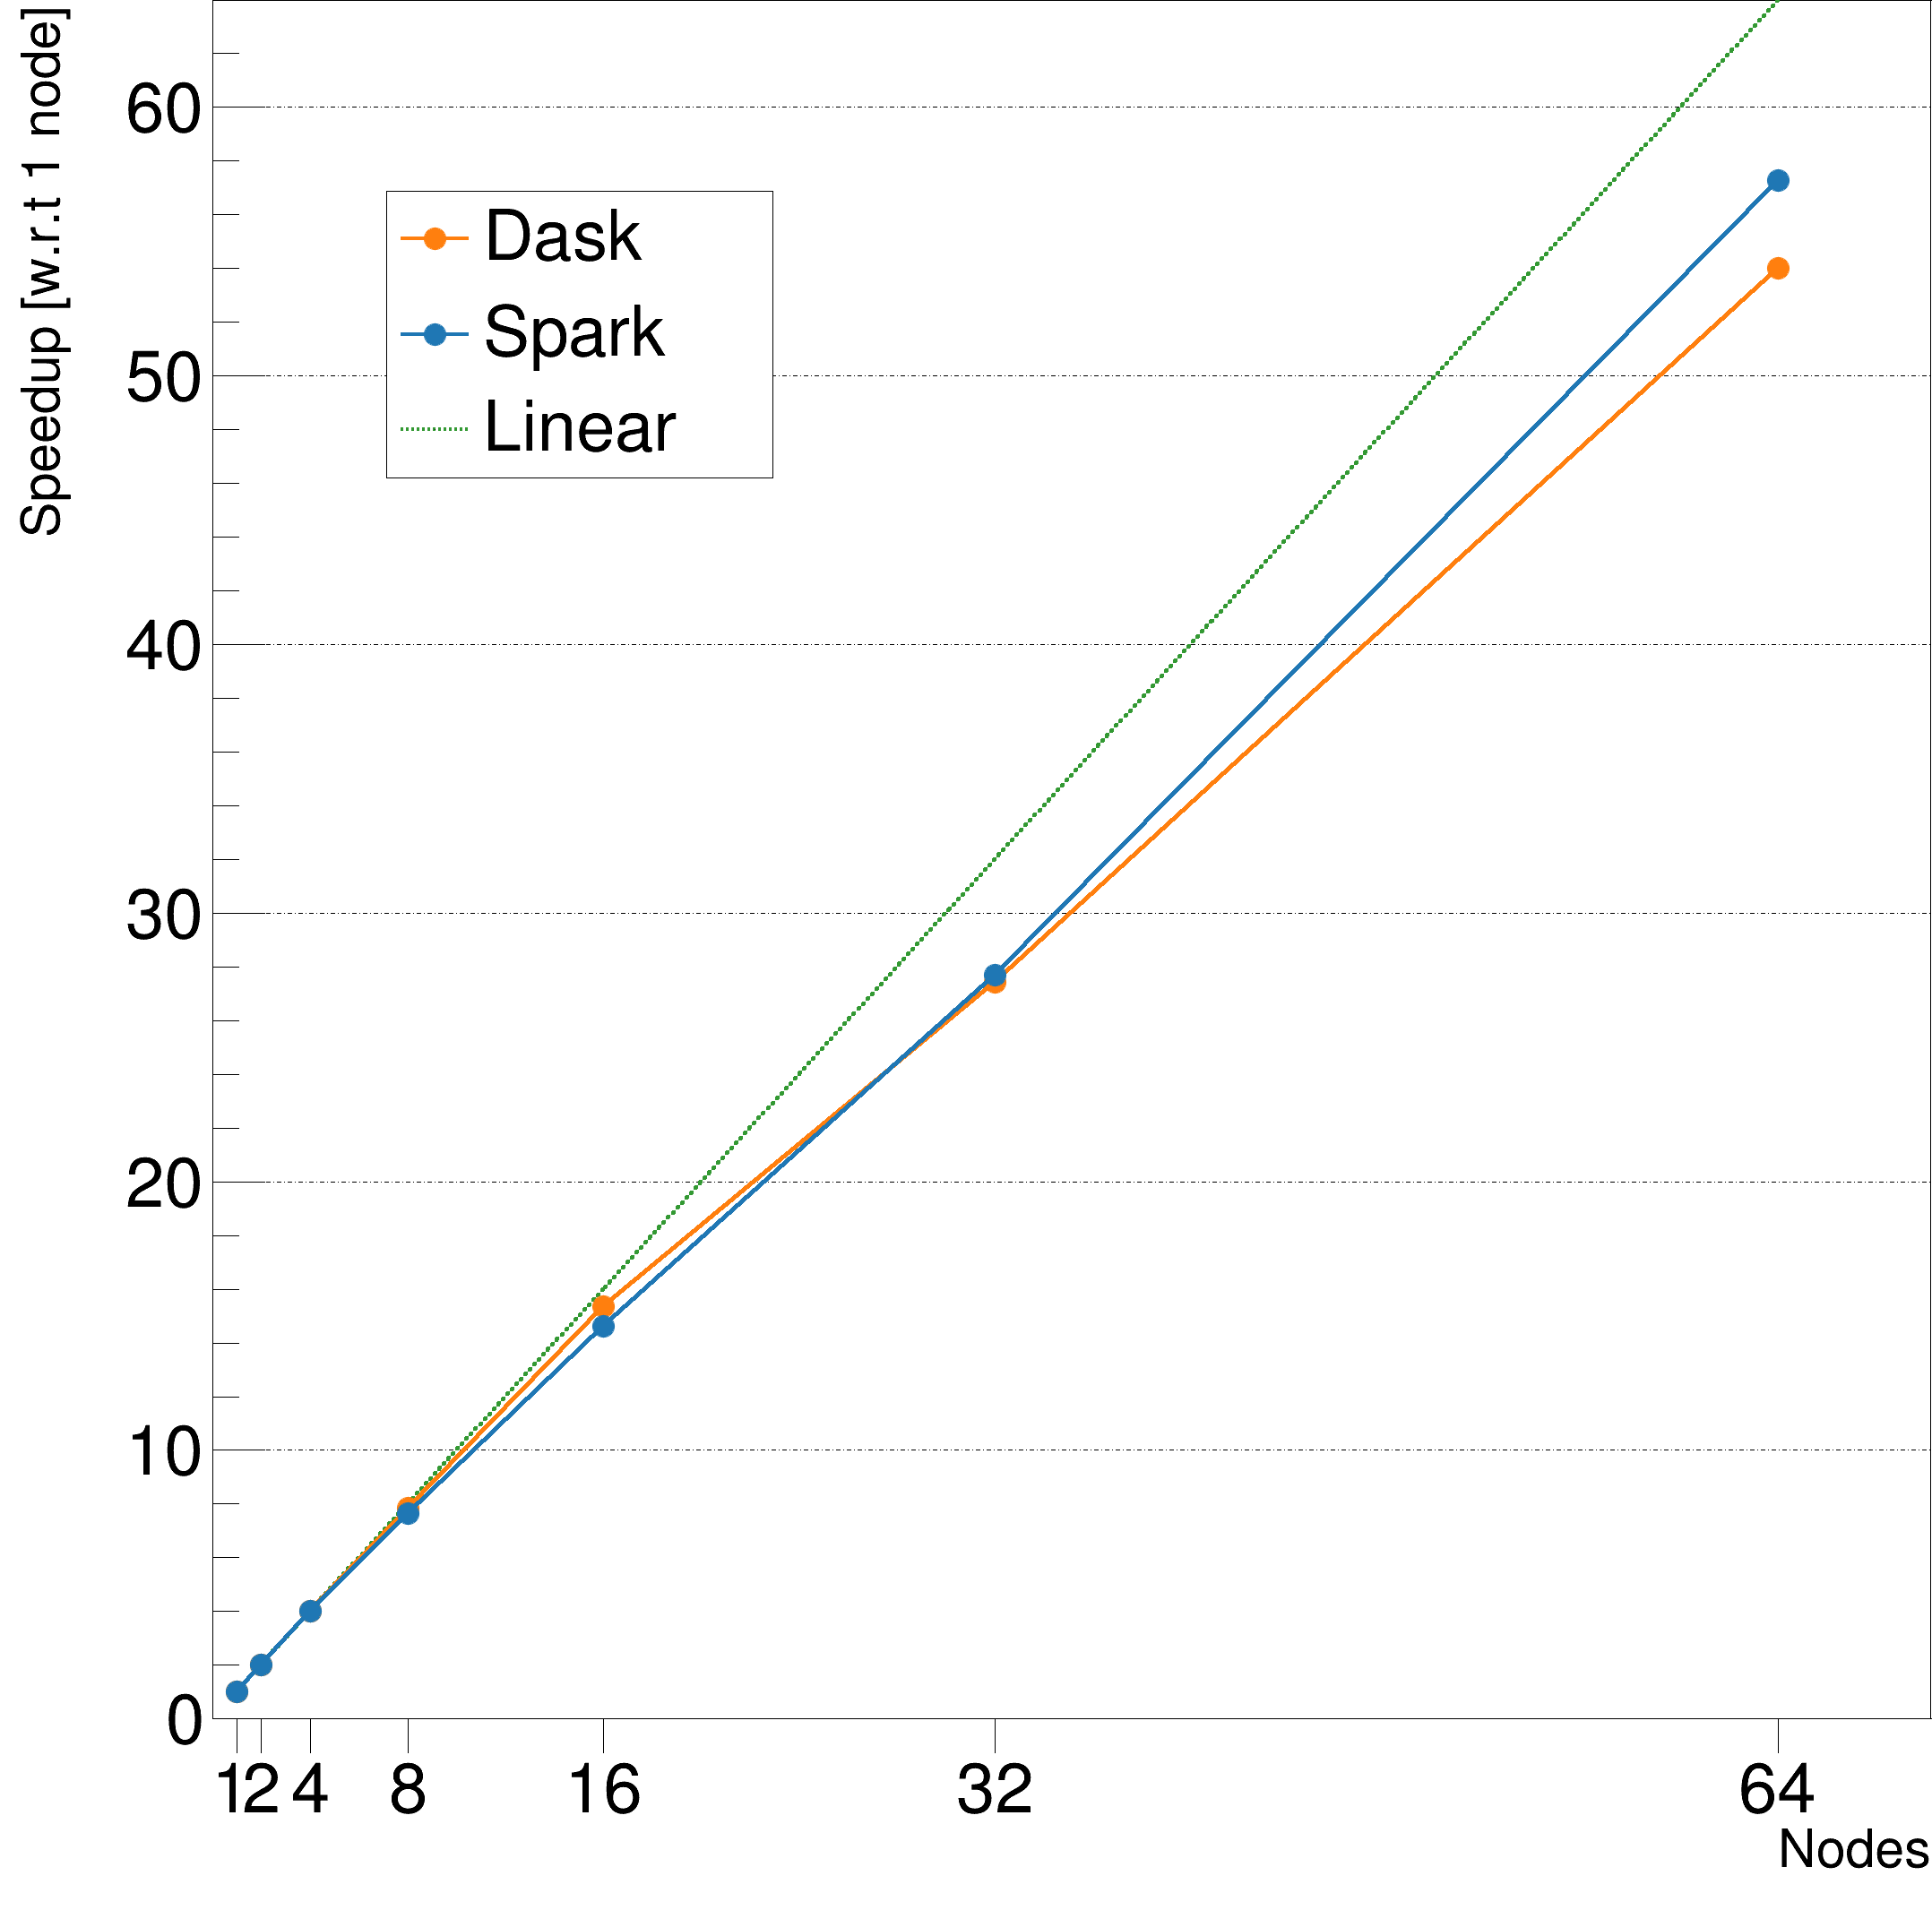

In [16]:
sparkgraph_hot = ROOT.TGraph(len(dfs["spark"]["ncores"]),
                             numpy.array(dfs["spark"]["ncores"], dtype=float),
                             numpy.array(dfs["spark"]["speedup_hot"], dtype=float))
daskgraph_hot = ROOT.TGraph(len(dfs["dask"]["ncores"]),
                            numpy.array(dfs["dask"]["ncores"], dtype=float),
                            numpy.array(dfs["dask"]["speedup_hot"], dtype=float))

idealspeedupgraph = ROOT.TGraph(len(dfs["dask"]["ncores"]),
                                numpy.array(dfs["dask"]["ncores"], dtype=float),
                                numpy.array(dfs["dask"]["ncores"]/32, dtype=float))

width = 2160
height = 2160
c = ROOT.TCanvas("c", "", width, height)

ymin, ymax = get_y_min_max(idealspeedupgraph, sparkgraph_hot)

idealspeedupgraph.SetTitle("")

idealspeedupgraph.GetXaxis().SetTitle("Nodes")
idealspeedupgraph.GetXaxis().SetTitleSize(0.03)
idealspeedupgraph.GetXaxis().SetTitleOffset(1.4)
idealspeedupgraph.GetXaxis().SetLabelSize(0)
idealspeedupgraph.GetXaxis().SetTickLength(0)

idealspeedupgraph.GetYaxis().SetTitle("Speedup [w.r.t 1 node]")
idealspeedupgraph.GetYaxis().SetTitleSize(0.03)
idealspeedupgraph.GetYaxis().SetTitleOffset(1.8)
idealspeedupgraph.GetYaxis().SetRangeUser(0, ymax)
idealspeedupgraph.GetYaxis().SetLabelSize(0.04)
#idealspeedupgraph.GetYaxis().SetTickLength(0)

#idealspeedupgraph.SetMarkerColor(ROOT.kAzure-3)
#idealspeedupgraph.SetMarkerSize(1)
#idealspeedupgraph.SetMarkerStyle(20)
idealspeedupgraph.SetLineStyle(ROOT.kDashed)
idealspeedupgraph.SetLineColorAlpha(PYPLOT_TCOLORS["tab:green"],1)
idealspeedupgraph.SetLineWidth(4)
idealspeedupgraph.Draw("AL")



dy = ymax - ymin
xlabels = []
xticks = []
#ylabels = []
#yticks = []

for i in range(len(dfs["spark"]["ncores"])):
    x = idealspeedupgraph.GetPointX(i)
    y = idealspeedupgraph.GetPointY(i)

    xt = ROOT.TLatex(x, -3.5, str(int(x/32)))
    xt.SetTextSize(0.04)
    xt.SetTextFont(42)
    if x == 32: # left-align the 1 node point
        xt.SetTextAlign(31)
    else:
        xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, 0, x,0-0.02*dy)
    xl.Draw()
    xticks.append(xl)
    
#    yt = ROOT.TLatex(-50, y-0.2, str(int(y)))
#    yt.SetTextSize(0.03)
#    yt.SetTextFont(42)
#    yt.SetTextAlign(21)
#    yt.Draw()
#    ylabels.append(yt)
#
#    yl = ROOT.TLine(0, y, 50, y)
#    yl.Draw()
#    yticks.append(yl)


daskgraph_hot.GetYaxis().SetLabelSize(0)
daskgraph_hot.SetMarkerSize(3)
daskgraph_hot.SetMarkerStyle(20)
daskgraph_hot.SetMarkerColor(PYPLOT_TCOLORS["tab:orange"])
daskgraph_hot.SetLineStyle(ROOT.kSolid)
daskgraph_hot.SetLineColorAlpha(PYPLOT_TCOLORS["tab:orange"],1)
daskgraph_hot.SetLineWidth(4)

daskgraph_hot.Draw("SAME PL")

sparkgraph_hot.GetYaxis().SetLabelSize(0)
sparkgraph_hot.SetMarkerSize(3)
sparkgraph_hot.SetMarkerStyle(20)
sparkgraph_hot.SetMarkerColor(PYPLOT_TCOLORS["tab:blue"])
sparkgraph_hot.SetLineStyle(ROOT.kSolid)
sparkgraph_hot.SetLineColorAlpha(PYPLOT_TCOLORS["tab:blue"],1)
sparkgraph_hot.SetLineWidth(4)

sparkgraph_hot.Draw("SAME PL")

legend = ROOT.TLegend(0.2,0.75,0.4,0.9)
legend.AddEntry(daskgraph_hot, "Dask")
legend.AddEntry(sparkgraph_hot, "Spark")
legend.AddEntry(idealspeedupgraph, "Linear")
legend.Draw()

ROOT.gStyle.SetLegendTextSize(0.04)
ROOT.gStyle.SetGridWidth(1)
ROOT.gStyle.SetGridStyle(5)
c.SetGridy()

c.SetRightMargin(0)
c.SetLeftMargin(0.11)
c.SetTopMargin(0)
c.SetBottomMargin(0.1)

c.Draw()
c.SaveAs("speedup_hot.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file runtime_cold.png has been created


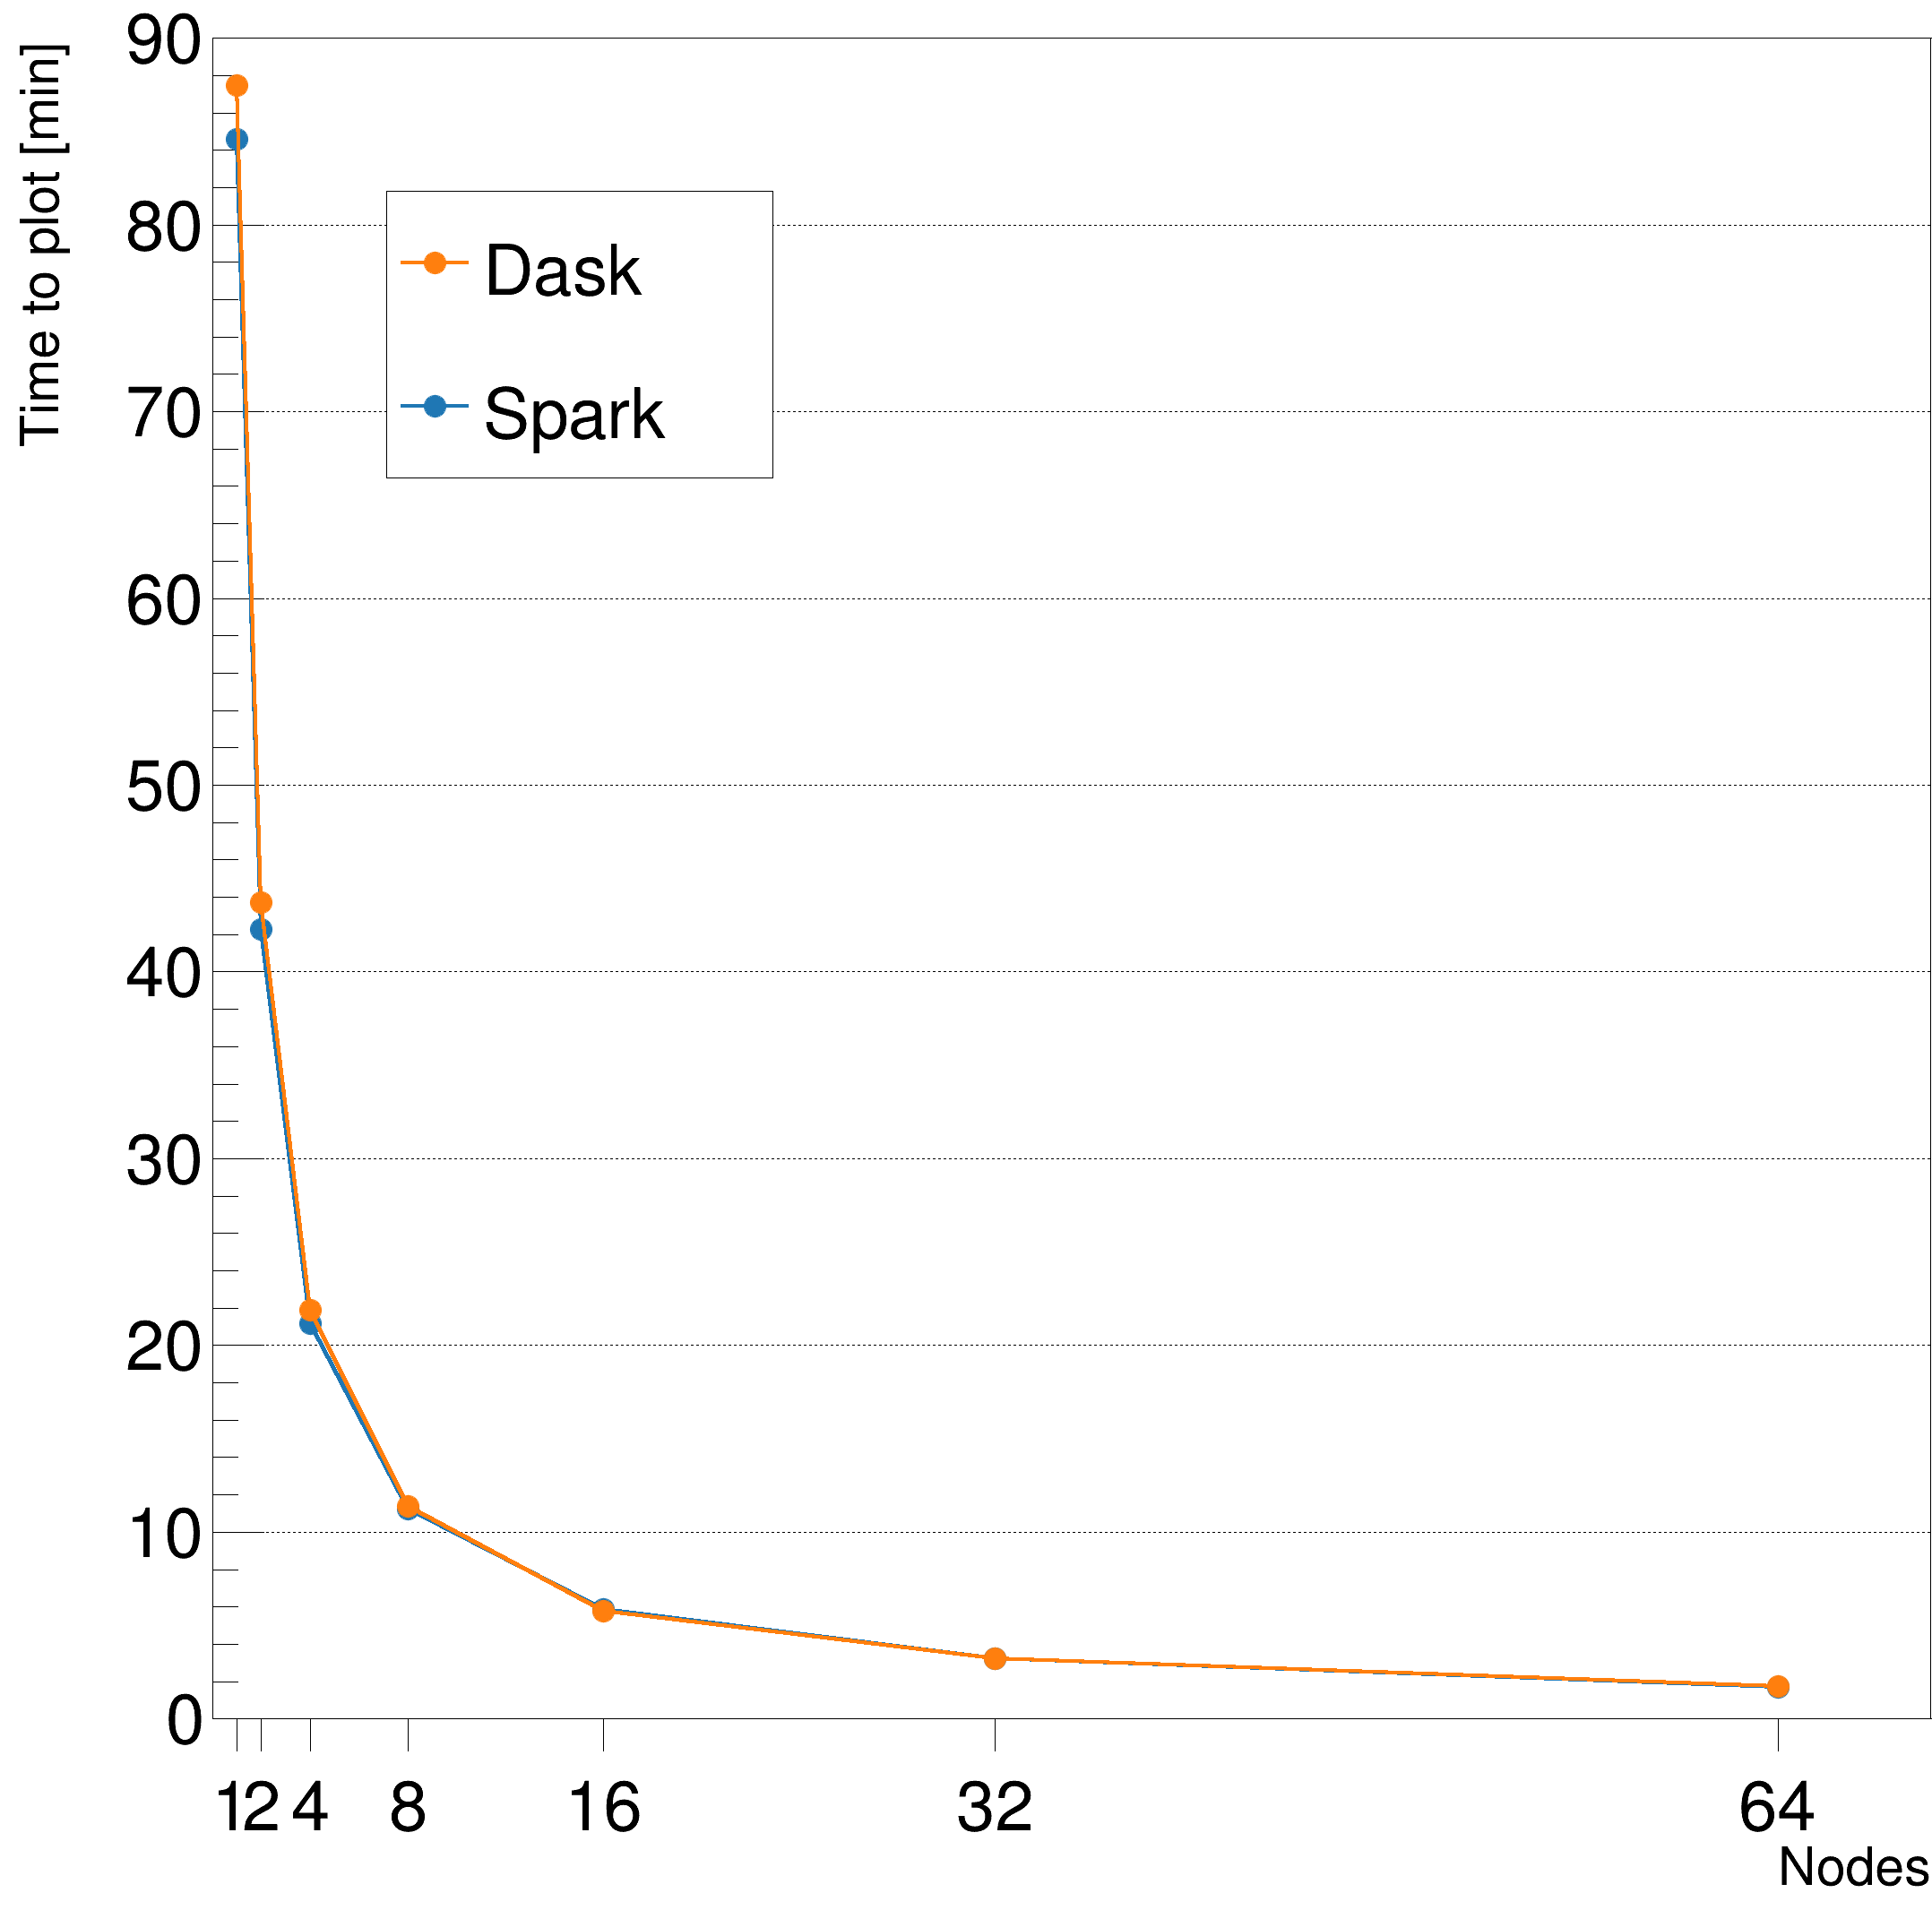

In [17]:
sparkgraph_cold = ROOT.TGraph(len(dfs["spark"]["ncores"]),
                              numpy.array(dfs["spark"]["ncores"], dtype=float),
                              numpy.array(dfs["spark"]["cold_minutes"], dtype=float))
daskgraph_cold = ROOT.TGraph(len(dfs["dask"]["ncores"]),
                             numpy.array(dfs["dask"]["ncores"], dtype=float),
                             numpy.array(dfs["dask"]["cold_minutes"], dtype=float))
width = 2160
height = 2160
c = ROOT.TCanvas("c", "", width, height)


ymin, ymax = get_y_min_max(sparkgraph_cold, daskgraph_cold)

sparkgraph_cold.SetTitle("")

sparkgraph_cold.GetXaxis().SetTitle("Nodes")
sparkgraph_cold.GetXaxis().SetTitleSize(0.03)
sparkgraph_cold.GetXaxis().SetTitleOffset(1.6)
sparkgraph_cold.GetXaxis().SetLabelSize(0)
sparkgraph_cold.GetXaxis().SetTickLength(0)

sparkgraph_cold.GetYaxis().SetTitle("Time to plot [min]")
sparkgraph_cold.GetYaxis().SetTitleSize(0.03)
sparkgraph_cold.GetYaxis().SetTitleOffset(1.8)
sparkgraph_cold.GetYaxis().SetRangeUser(0, round_to_nearest_5(ymax))
sparkgraph_cold.GetYaxis().SetLabelSize(0.04)
sparkgraph_cold.GetYaxis().SetNdivisions(510)
#sparkgraph.GetYaxis().SetTickLength(0)


sparkgraph_cold.SetMarkerColor(PYPLOT_TCOLORS["tab:blue"])
sparkgraph_cold.SetMarkerSize(3)
sparkgraph_cold.SetMarkerStyle(20)
sparkgraph_cold.SetLineStyle(ROOT.kSolid)
sparkgraph_cold.SetLineColorAlpha(PYPLOT_TCOLORS["tab:blue"],1)
sparkgraph_cold.SetLineWidth(4)
sparkgraph_cold.Draw("ALP")


dy = ymax - ymin
xlabels = []
xticks = []
#ylabels = []
#yticks = []

for i in range(len(dfs["spark"]["ncores"])):
    x = sparkgraph_cold.GetPointX(i)
    y = sparkgraph_cold.GetPointY(i)

    xt = ROOT.TLatex(x, -6, str(int(x/32)))
    xt.SetTextSize(0.04)
    xt.SetTextFont(42)
    if x == 32: # left-align the 1 node point
        xt.SetTextAlign(31)
    else:
        xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, 0, x,0-0.02*dy)
    xl.Draw()
    xticks.append(xl)
    
    #yt = ROOT.TLatex(-0.5, y-0.2, str(int(y)))
    #yt.SetTextSize(0.03)
    #yt.SetTextFont(42)
    #yt.SetTextAlign(21)
    #yt.Draw()
    #ylabels.append(yt)

    #yl = ROOT.TLine(0, y, 0.3, y)
    #yl.Draw()
    #yticks.append(yl)


daskgraph_cold.GetYaxis().SetLabelSize(0)
daskgraph_cold.SetMarkerSize(3)
daskgraph_cold.SetMarkerStyle(20)
daskgraph_cold.SetMarkerColor(PYPLOT_TCOLORS["tab:orange"])
daskgraph_cold.SetLineStyle(ROOT.kSolid)
daskgraph_cold.SetLineColorAlpha(PYPLOT_TCOLORS["tab:orange"],1)
daskgraph_cold.SetLineWidth(4)

daskgraph_cold.Draw("SAME PL")

legend = ROOT.TLegend(0.2,0.75,0.4,0.9)
legend.AddEntry(daskgraph_cold, "Dask")
legend.AddEntry(sparkgraph_cold, "Spark")
legend.Draw()

ROOT.gStyle.SetLegendTextSize(0.04)
ROOT.gStyle.SetGridWidth(1)
ROOT.gStyle.SetGridStyle(2)
c.SetGridy()

c.SetRightMargin(0)
c.SetLeftMargin(0.11)
c.SetTopMargin(0.02)
c.SetBottomMargin(0.1)

c.Draw()
c.SaveAs("runtime_cold.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file runtime_hot.png has been created


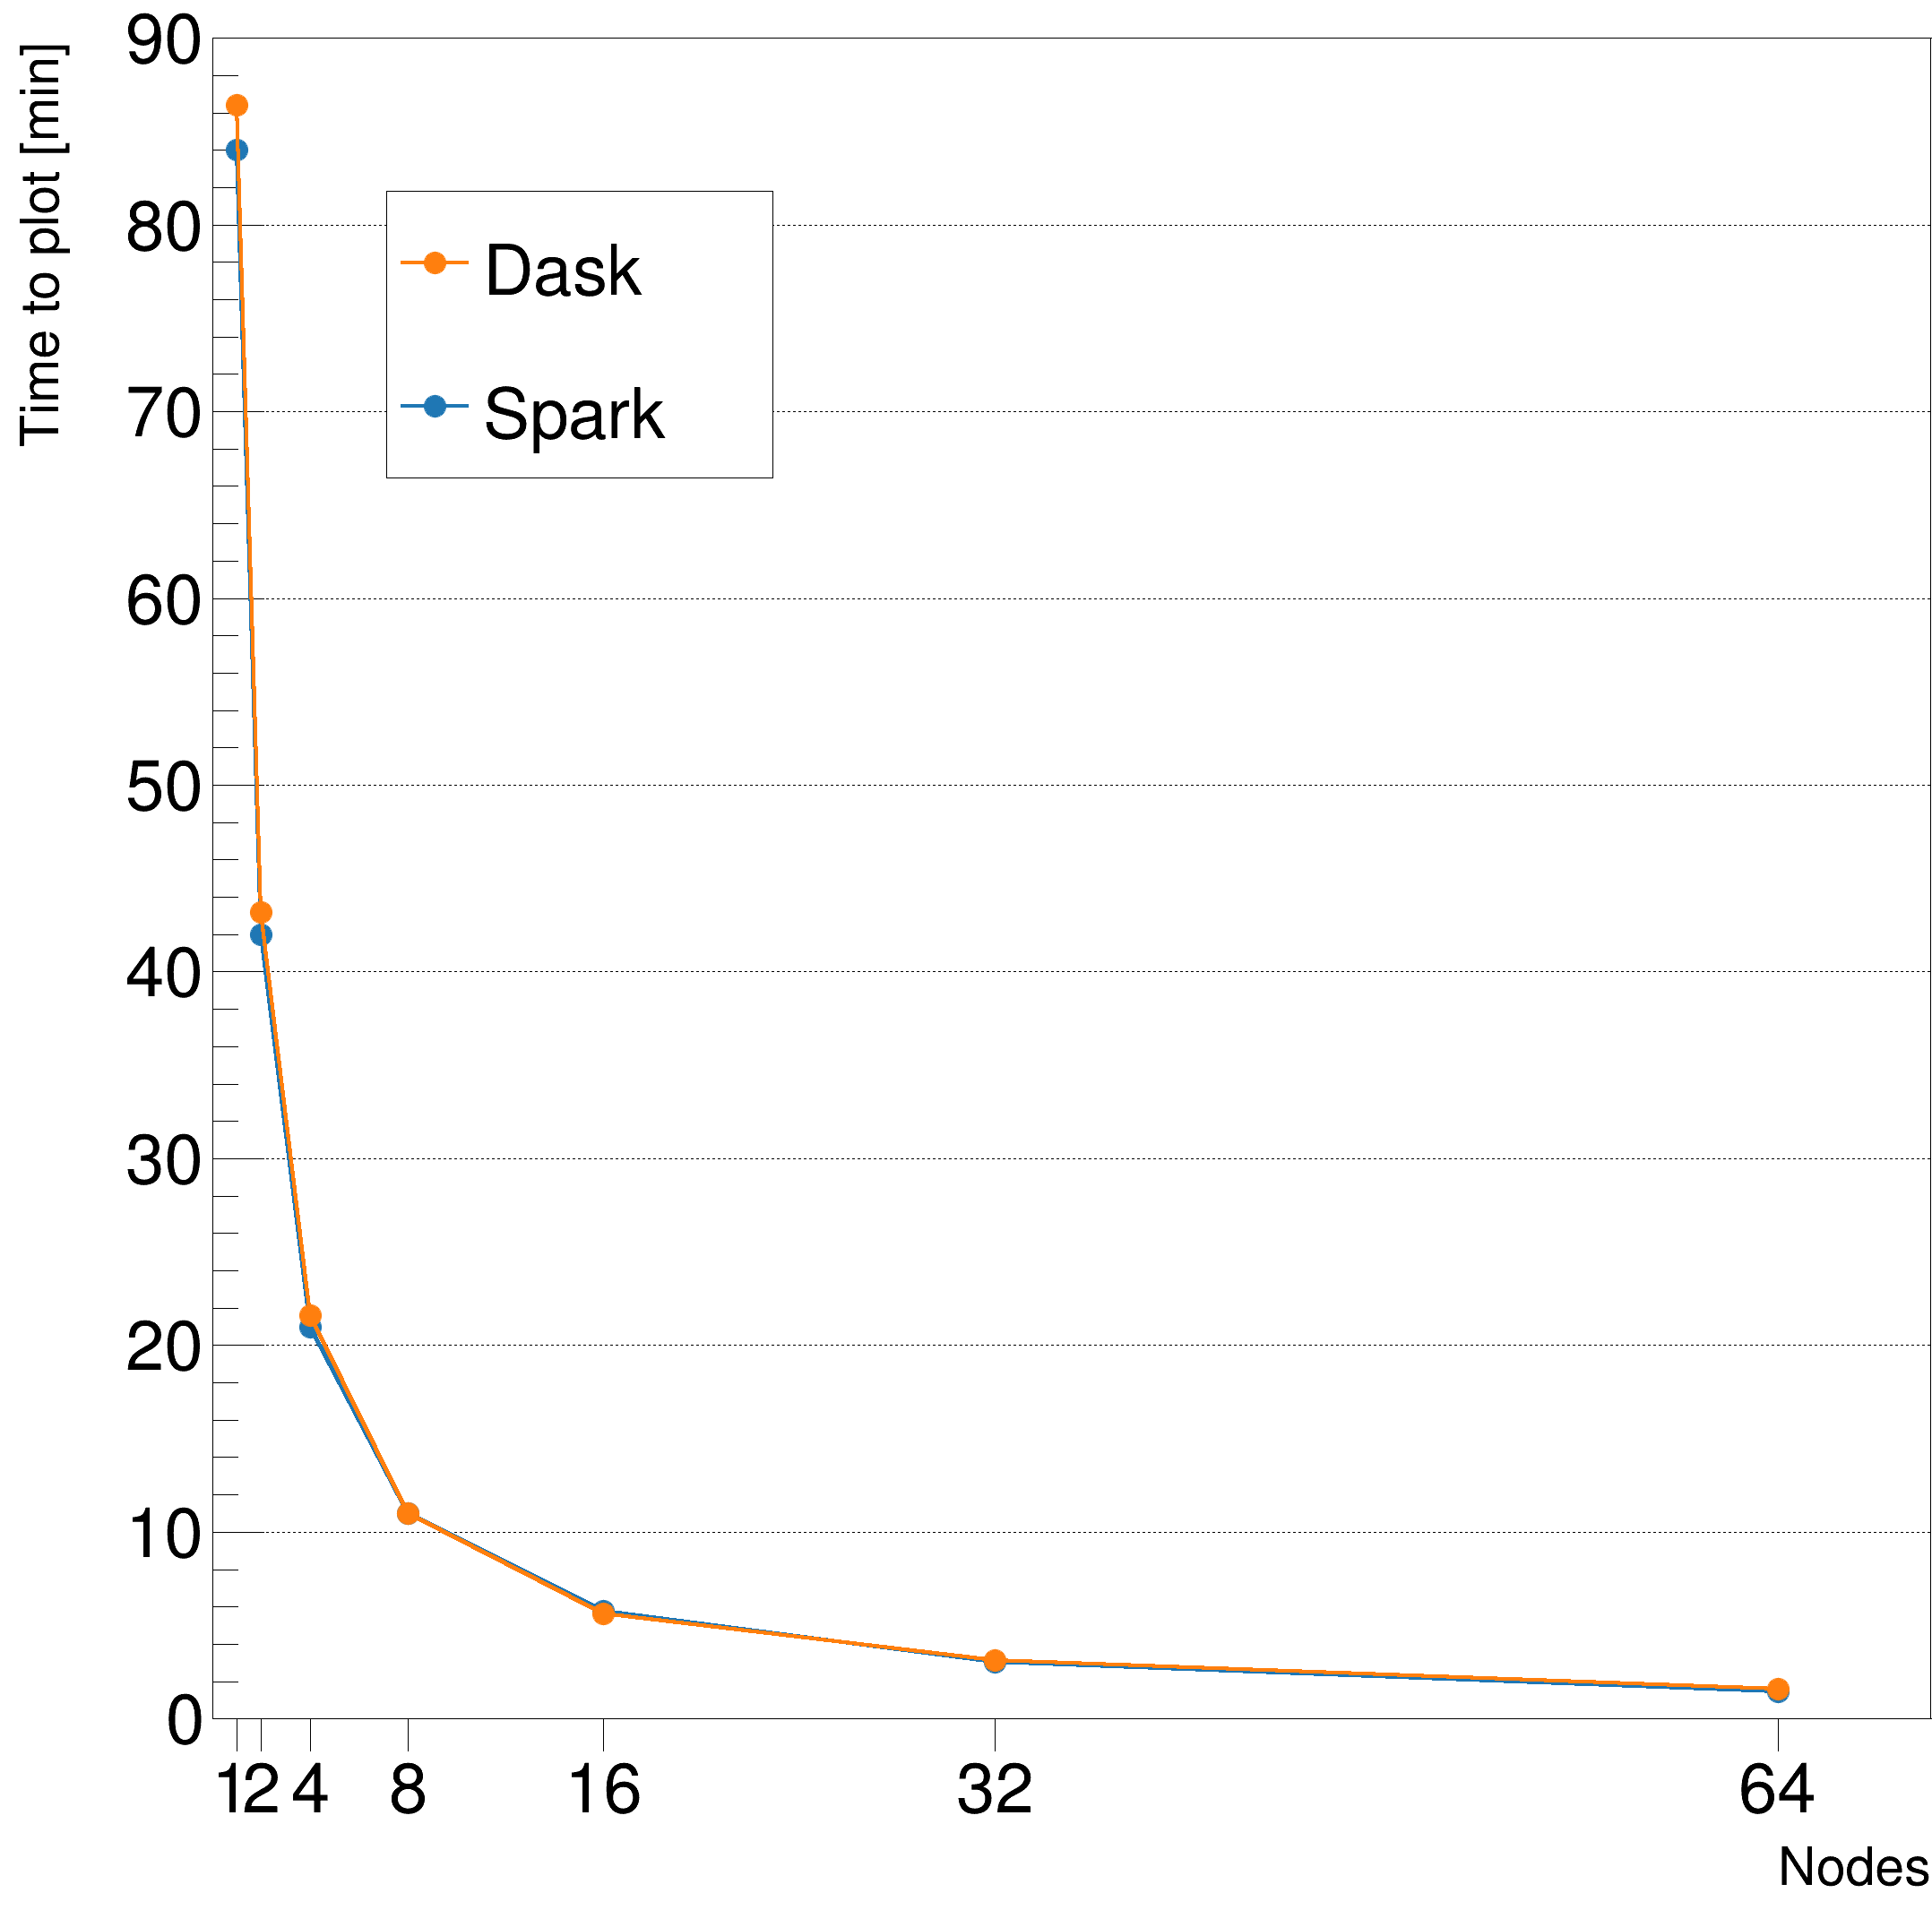

In [18]:
sparkgraph_cold = ROOT.TGraph(len(dfs["spark"]["ncores"]),
                              numpy.array(dfs["spark"]["ncores"], dtype=float),
                              numpy.array(dfs["spark"]["hot_minutes"], dtype=float))
daskgraph_cold = ROOT.TGraph(len(dfs["dask"]["ncores"]),
                             numpy.array(dfs["dask"]["ncores"], dtype=float),
                             numpy.array(dfs["dask"]["hot_minutes"], dtype=float))
width = 2160
height = 2160
c = ROOT.TCanvas("c", "", width, height)




ymin, ymax = get_y_min_max(sparkgraph_cold, daskgraph_cold)

sparkgraph_cold.SetTitle("")

sparkgraph_cold.GetXaxis().SetTitle("Nodes")
sparkgraph_cold.GetXaxis().SetTitleSize(0.03)
sparkgraph_cold.GetXaxis().SetTitleOffset(1.6)
sparkgraph_cold.GetXaxis().SetLabelSize(0)
sparkgraph_cold.GetXaxis().SetTickLength(0)

sparkgraph_cold.GetYaxis().SetTitle("Time to plot [min]")
sparkgraph_cold.GetYaxis().SetTitleSize(0.03)
sparkgraph_cold.GetYaxis().SetTitleOffset(1.8)
sparkgraph_cold.GetYaxis().SetRangeUser(0, round_to_nearest_5(ymax))
sparkgraph_cold.GetYaxis().SetLabelSize(0.04)
sparkgraph_cold.GetYaxis().SetNdivisions(510)
#sparkgraph.GetYaxis().SetTickLength(0)


sparkgraph_cold.SetMarkerColor(PYPLOT_TCOLORS["tab:blue"])
sparkgraph_cold.SetMarkerSize(3)
sparkgraph_cold.SetMarkerStyle(20)
sparkgraph_cold.SetLineStyle(ROOT.kSolid)
sparkgraph_cold.SetLineColorAlpha(PYPLOT_TCOLORS["tab:blue"],1)
sparkgraph_cold.SetLineWidth(4)
sparkgraph_cold.Draw("ALP")


dy = ymax - ymin
xlabels = []
xticks = []
#ylabels = []
#yticks = []

for i in range(len(dfs["spark"]["ncores"])):
    x = sparkgraph_cold.GetPointX(i)
    y = sparkgraph_cold.GetPointY(i)

    xt = ROOT.TLatex(x, -5, str(int(x/32)))
    xt.SetTextSize(0.04)
    xt.SetTextFont(42)
    if x == 32: # left-align the 1 node point
        xt.SetTextAlign(31)
    else:
        xt.SetTextAlign(21)
    xt.Draw()
    xlabels.append(xt)

    xl = ROOT.TLine(x, 0, x,0-0.02*dy)
    xl.Draw()
    xticks.append(xl)
    
    #yt = ROOT.TLatex(-0.5, y-0.2, str(int(y)))
    #yt.SetTextSize(0.03)
    #yt.SetTextFont(42)
    #yt.SetTextAlign(21)
    #yt.Draw()
    #ylabels.append(yt)

    #yl = ROOT.TLine(0, y, 0.3, y)
    #yl.Draw()
    #yticks.append(yl)


daskgraph_cold.GetYaxis().SetLabelSize(0)
daskgraph_cold.SetMarkerSize(3)
daskgraph_cold.SetMarkerStyle(20)
daskgraph_cold.SetMarkerColor(PYPLOT_TCOLORS["tab:orange"])
daskgraph_cold.SetLineStyle(ROOT.kSolid)
daskgraph_cold.SetLineColorAlpha(PYPLOT_TCOLORS["tab:orange"],1)
daskgraph_cold.SetLineWidth(4)

daskgraph_cold.Draw("SAME PL")

legend = ROOT.TLegend(0.2,0.75,0.4,0.9)
legend.AddEntry(daskgraph_cold, "Dask")
legend.AddEntry(sparkgraph_cold, "Spark")
legend.Draw()

ROOT.gStyle.SetLegendTextSize(0.04)
ROOT.gStyle.SetGridWidth(1)
ROOT.gStyle.SetGridStyle(2)
c.SetGridy()

c.SetRightMargin(0)
c.SetLeftMargin(0.11)
c.SetTopMargin(0.02)
c.SetBottomMargin(0.1)

c.Draw()
c.SaveAs("runtime_hot.png")